In [0]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
reviews = pd.read_csv('ratings.csv', sep=',')

In [6]:
print (reviews.shape)

(100004, 4)


In [7]:
reviews.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [2]:
reviews['rating'].describe()

NameError: name 'reviews' is not defined

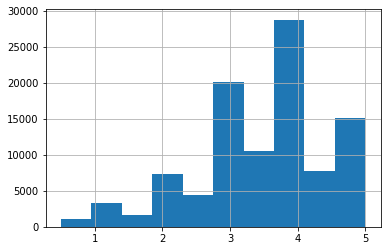

In [9]:
reviews['rating'].hist(bins=10)

In [10]:
users = reviews.userId.unique()
user_map = {i:val for i,val in enumerate(users)}
inverse_user_map = {val:i for i,val in enumerate(users)}
movies = reviews.movieId.unique()
movie_map = {i:val for i,val in enumerate(movies)}
inverse_movie_map = {val:i for i,val in enumerate(movies)}

reviews["userId"] = reviews["userId"].map(inverse_user_map)
reviews["oldId"] = reviews["movieId"] 
reviews["movieId"] =reviews["movieId"].map(inverse_movie_map)

print ("We have %d users"%users.shape[0])
print ("We have %d movies"%movies.shape[0])

We have 671 users
We have 9066 movies


In [11]:
users_nb = reviews['userId'].value_counts().reset_index()
users_nb.columns= ['userId','nb_lines']
users_nb['nb_lines'].describe()

count     671.000000
mean      149.037258
std       231.226948
min        20.000000
25%        37.000000
50%        71.000000
75%       161.000000
max      2391.000000
Name: nb_lines, dtype: float64

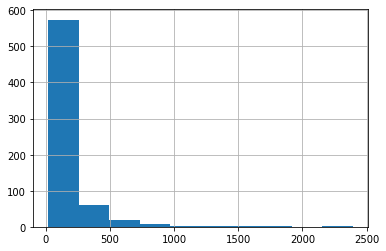

In [12]:
import seaborn
users_nb['nb_lines'].hist()

In [13]:
movies_nb = reviews['oldId'].value_counts().reset_index()
movies_nb.columns= ['oldId','nb_lines']
movies_nb['nb_lines'].describe()

count    9066.000000
mean       11.030664
std        24.050800
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       341.000000
Name: nb_lines, dtype: float64

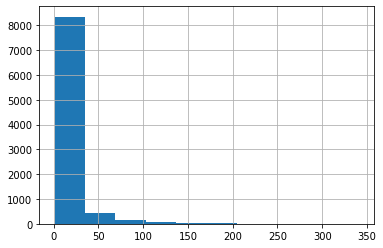

In [14]:
movies_nb['nb_lines'].hist()

In [15]:
a = reviews.dropna()[['movieId','userId','rating']]
pd.set_option('display.max_colwidth', 100)
a.head(10)

,movieId,userId,rating
0,0,0,2.5
1,1,0,3.0
2,2,0,3.0
3,3,0,2.0
4,4,0,4.0
5,5,0,2.0
6,6,0,2.0
7,7,0,2.0
8,8,0,3.5
9,9,0,2.0


In [16]:
a.shape[0]/float(reviews.shape[0])

1.0